In [2]:
from toapertopt import *

In [264]:
def gauss(t, fwhm, a, dt):
    return a*np.exp(-4*np.log(2)*((t+dt)/fwhm)**2)

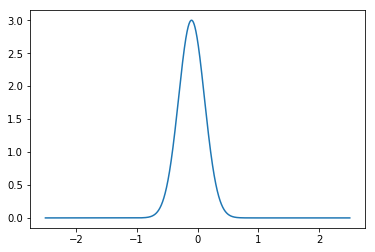

In [265]:
taxis = np.linspace(-2.5, 2.5, 10000)
pulse = gauss(taxis, 0.5, 3, 0.1)
plt.plot(taxis, pulse)
plt.show()

In [17]:
dso, dsl, f, dm, ax, ay = 1.1*kpc*pctocm, 0.55*kpc*pctocm, 0.8*GHz, -1e-2*pctocm, 1.2*autocm, 1.5*autocm
alp = alpha(dso, dsl, f, dm)
rF2 = rFsqr(dso, dsl, f)
lc = lensc(dm, f)
tg0 = tg0coeff(dso, dsl)
tdm0 = tdm0coeff(dm, f)

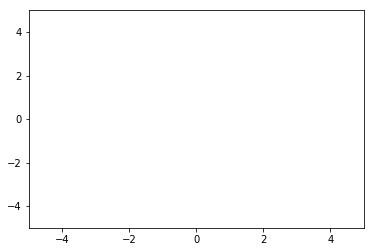

In [9]:
roots = polishedRoots(lensEq, 5., 5., args = ([1., 1.], alp*np.array([1./ax**2, 1./ay**2])))

In [10]:
roots

array([[-0.46378409, -0.98043785],
       [-0.11443466, -0.19110552],
       [ 1.42104472,  1.23399984]])

In [14]:
fields = np.zeros([3, 3])
for i in range(3):
    fields[i] = GOfield(roots[i], rF2, lc, ax, ay)

In [15]:
fields

array([[ 3.63722224e-01,  3.63831615e+05,  0.00000000e+00],
       [ 1.57302544e-01,  4.20192377e+05, -1.57079633e+00],
       [ 7.16777759e-01,  1.78021388e+04,  1.57079633e+00]])

In [18]:
toas = np.zeros(3)
for i in range(3):
    toas[i] = deltat(roots[i], tg0, tdm0, alp, ax, ay)

In [19]:
toas

array([ 32.39830691, -39.77799621,  -0.21192706])

In [64]:
rF2

5.060973844534602e+21

In [65]:
def phit(phi0, upvec, uvec, veff, ax, ay, taxis, rF2):
    a = np.array([ax, ay])
    return phi0 + np.dot(a*(upvec - uvec), veff*1e5)*taxis*1e-3/rF2

In [72]:
veff = np.ones(2)*3000./np.sqrt(2.)
phits = np.zeros([3, 10000])
for i in range(3):
    phits[i] = phit(fields[i][1] + fields[i][2], [1., 1.], roots[i], veff, ax, ay, taxis, rF2)

In [78]:
phits[0] - phits[1]

array([-56359.19302359, -56359.19302309, -56359.19302258, ...,
       -56359.18799809, -56359.18799759, -56359.18799708])

In [74]:
pulses = np.zeros([3, 10000])
for i in range(3):
    pulses[i] = gauss(taxis, 0.5, fields[i][0], toas[i]*1e-3)

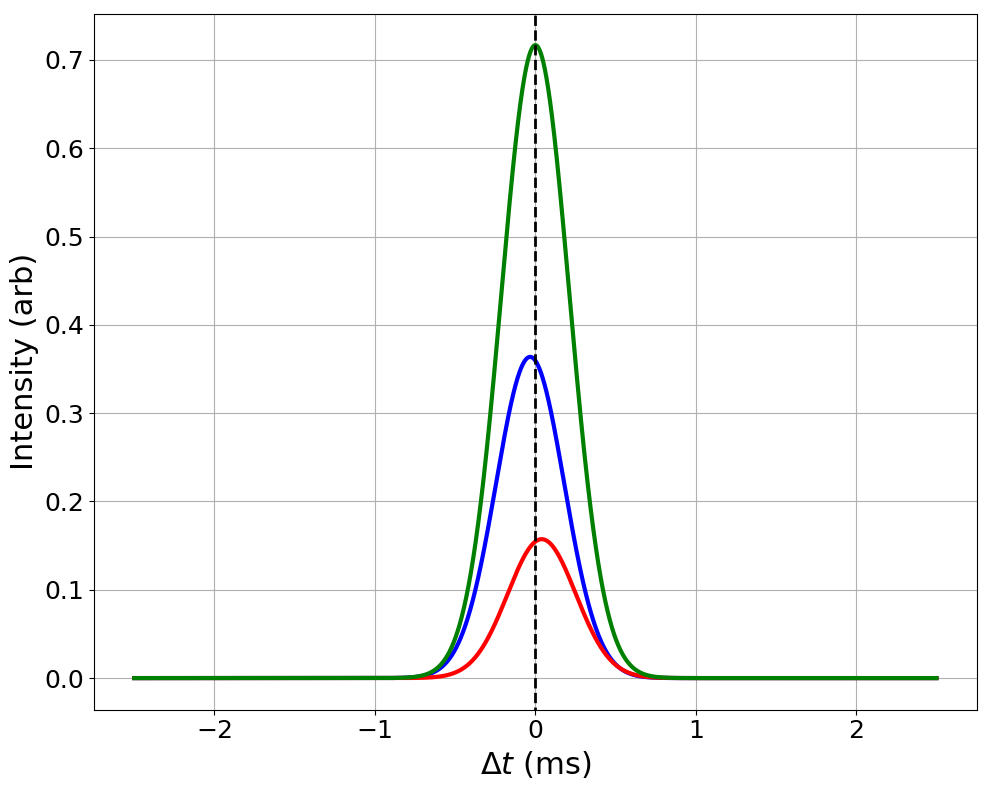

In [75]:
plt.figure(figsize = (10, 8), dpi = 100)
plt.xlabel(r'$\Delta t$ (ms)', fontsize = 22)
plt.ylabel('Intensity (arb)', fontsize = 22)
plt.tick_params(labelsize = 18)
plt.plot(taxis, pulses[0], color = 'blue', lw = 3)
plt.plot(taxis, pulses[1], color = 'red', lw = 3)
plt.plot(taxis, pulses[2], color = 'green', lw = 3)
plt.plot([0, 0], [-1, 10], scaley = False, ls = 'dashed', color = 'black', lw = 2.)
plt.tight_layout()
plt.grid()
plt.show()

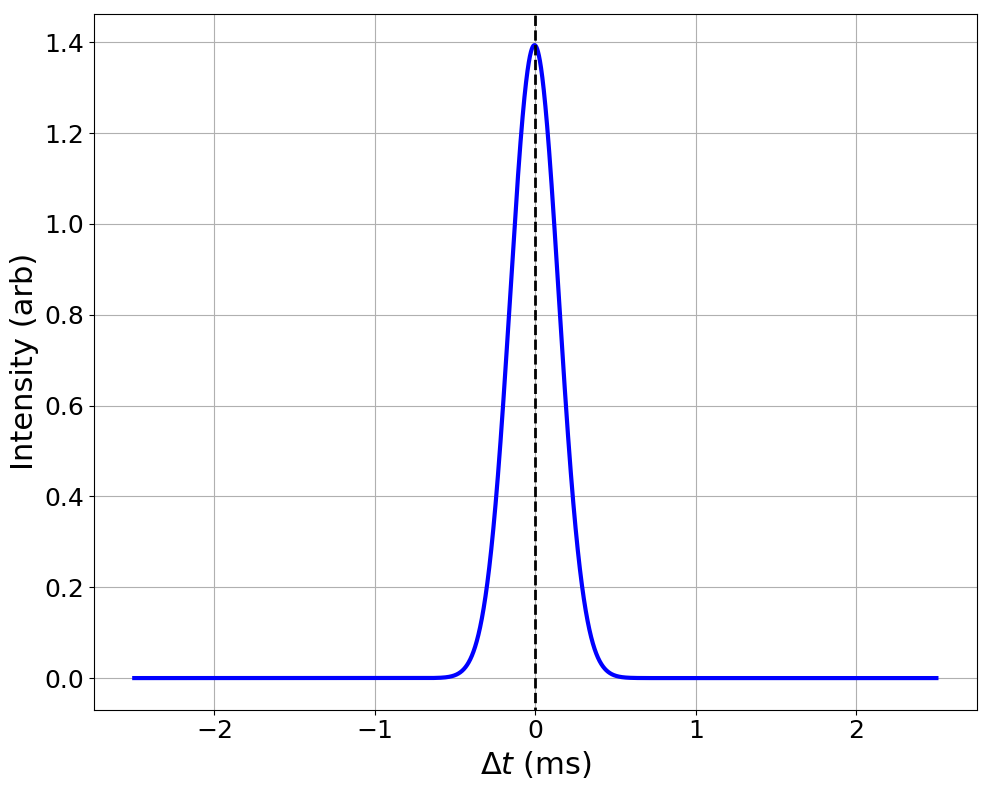

In [76]:
comb = np.abs(np.sum(pulses*np.exp(1j*phits), axis = 0))**2
plt.figure(figsize = (10, 8), dpi = 100)
plt.xlabel(r'$\Delta t$ (ms)', fontsize = 22)
plt.ylabel('Intensity (arb)', fontsize = 22)
plt.tick_params(labelsize = 18)
plt.plot(taxis, comb, color = 'blue', lw = 3)
plt.plot([0, 0], [-1, 10], scaley = False, ls = 'dashed', color = 'black', lw = 2.)
plt.tight_layout()
plt.grid()
plt.show()

In [77]:
a = np.ones([3, 4])
np.sum(a)

12.0

In [34]:
np.sum(a, axis = 0)

array([3., 3., 3., 3.])

In [38]:
np.sum(pulses*np.exp(1j*phits), axis = 0)

array([-1.92954409e-30-1.16700981e-30j, -2.53958088e-30-1.53510119e-30j,
       -3.34063757e-30-2.01817491e-30j, -4.39194251e-30-2.65179469e-30j,
       -5.77090479e-30-3.48241310e-30j, -7.57863777e-30-4.57067117e-30j,
       -9.94714323e-30-5.99568721e-30j, -1.30486498e-29-7.86062830e-30j,
       -1.71077450e-29-1.02999438e-29j, -2.24171269e-29-1.34887515e-29j,
       -2.93580444e-29-1.76550095e-29j, -3.84268062e-29-2.30952924e-29j,
       -5.02691398e-29-3.01952258e-29j, -6.57247008e-29-3.94559410e-29j,
       -8.58846962e-29-5.15283029e-29j, -1.12166445e-28-6.72571690e-29j,
       -1.46409795e-28-8.77385875e-29j, -1.91001739e-28-1.14393673e-28j,
       -2.49037371e-28-1.49063971e-28j, -3.24527676e-28-1.94134483e-28j,
       -4.22667616e-28-2.52692292e-28j, -5.50181813e-28-3.28730972e-28j,
       -7.15770028e-28-4.27413829e-28j, -9.30680928e-28-5.55412738e-28j,
       -1.20945064e-27-7.21343996e-28j, -1.57085288e-27-9.36328685e-28j,
       -2.03912060e-27-1.21471266e-27j, -2.64551573

In [391]:
def pairdiff(array):
    diff = []
    for i in range(len(array)):
        for j in range(len(array)):
            if i != j:
                d = list(np.abs(array[i] - array[j]))
                if d not in diff:
                    diff.append(d)
    return np.array(diff)

def pulseint(dso, dsl, f, dm, upvec, veff, taxis, dt):
    a = np.array([ax, ay])
    alp = alpha(dso, dsl, f, dm)
    rF2 = rFsqr(dso, dsl, f)
    print("rF2 = " +str(rF2))
    lc = lensc(dm, f)
    tg0 = tg0coeff(dso, dsl)
    tdm0 = tdm0coeff(dm, f)
    coeff = alp/a**2.
    roots = polishedRoots(lensEq, upvec[0] + 5., upvec[1] + 5., args = (upvec, coeff))
    plt.close()
    print("Roots = " + str(roots))
    diff = pairdiff(roots)
    param = []
    for d in diff:
        param.append(np.abs(rF2/(dt*np.dot(veff, a*d))))
    print("Int. params = " + str(param))
    nroots = len(roots)
    fields = np.zeros([nroots, 3])
    toas = np.zeros(nroots)
    tsam = len(taxis)
    for i in range(nroots):
        fields[i] = GOfield(roots[i], rF2, lc, ax, ay)
        toas[i] = deltat(roots[i], tg0, tdm0, alp, ax, ay)*1e-6
    print("TOAs (s) =" + str(toas))
    print("Amps = " + str(fields.T[0]))
    phases = np.zeros([nroots, tsam])
    for i in range(nroots):
        phi0 = fields[i][1] + fields[i][2]
        phases[i] = phi0 + np.dot(a*(upvec - roots[i]), veff)*taxis/rF2
    pulses = np.zeros([nroots, tsam], dtype = complex)
    for i in range(nroots):
        pulses[i] = gauss(taxis, dt, fields[i][0], -toas[i])*np.exp(1j*phases[i])
    plt.figure(figsize = (10, 8), dpi = 100)
    plt.ylabel('Intensity (arb)', fontsize = 22)
    plt.tick_params(labelsize = 18)
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    xlab = r'$\Delta t$ (s)'
    if taxis[-1] < 1e-2:
        taxis = taxis*1e3
        xlab = r'$\Delta t$ (ms)'
    for i in range(nroots):
        plt.plot(taxis, np.abs(pulses[i])**2., color = colors[i], lw = 3)
    plt.plot([0, 0], [-1, 10], scaley = False, ls = 'dashed', color = 'black', lw = 2.)
    plt.xlabel(xlab, fontsize = 22)
    plt.tight_layout()
    plt.grid()
    comb = np.abs(np.sum(pulses, axis = 0))**2
    plt.figure(figsize = (10, 8), dpi = 100)
    plt.xlabel(xlab, fontsize = 22)
    plt.ylabel('Intensity (arb)', fontsize = 22)
    plt.tick_params(labelsize = 18)
    plt.plot(taxis, comb, color = 'blue', lw = 3)
    plt.plot([0, 0], [-1, 10], scaley = False, ls = 'dashed', color = 'black', lw = 2.)
    plt.tight_layout()
    plt.grid()
    plt.show()
    return

def pulsedynspec(dso, dsl, fmin, fmax, dm, upvec, veff, taxis, dt, nf):
    a = np.array([ax, ay])
    tg0 = tg0coeff(dso, dsl)
    fvec = np.linspace(fmin, fmax, nf)
    nt = len(taxis)
    dspec = np.zeros([nf, nt])
    for i in range(nf):
        f = fvec[i]
        alp = alpha(dso, dsl, f, dm)
        rF2 = rFsqr(dso, dsl, f)
        lc = lensc(dm, f)
        tdm0 = tdm0coeff(dm, f)
        coeff = alp/a**2.
        roots = polishedRoots(lensEq, upvec[0] + 5., upvec[1] + 5., args = (upvec, coeff))
        plt.close()
        nroots = len(roots)
        fields = np.zeros([nroots, 3])
        toas = np.zeros(nroots)
        tsam = len(taxis)
        for j in range(nroots):
            fields[j] = GOfield(roots[j], rF2, lc, ax, ay)
            toas[j] = deltat(roots[j], tg0, tdm0, alp, ax, ay)*1e-6
        phases = np.zeros([nroots, tsam])
        for j in range(nroots):
            phi0 = fields[j][1] + fields[j][2]
            phases[j] = phi0 + np.dot(a*(upvec - roots[j]), veff)*taxis/rF2
        pulses = np.zeros([nroots, tsam], dtype = complex)
        for j in range(nroots):
            pulses[j] = gauss(taxis, dt, fields[j][0], -toas[j])*np.exp(1j*phases[j])
        comb = np.abs(np.sum(pulses, axis = 0))**2
        dspec[i] = comb
    if taxis[-1] < 1e-2:
        taxis = taxis*1e3
        xlab = r'$\Delta t$ (ms)'
    plt.figure(figsize = (10, 8), dpi = 100)
    plt.imshow(dspec.T, origin = 'lower', aspect = 'auto', extent = (min(taxis), max(taxis), fmin/GHz, fmax/GHz))
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize = 14)
    plt.xlabel(xlab, fontsize = 18)
    plt.ylabel(r'$\nu$ (GHz)', fontsize = 18)
    plt.tick_params(labelsize = 14)
    plt.tight_layout()
    plt.grid()
    plt.show()
    return

In [388]:
dso, dsl, f, dm, ax, ay = 10.*kpc*pctocm, 0.5*kpc*pctocm, 0.82*GHz, -1e-2*pctocm, 1.*autocm, 1.*autocm
taxis = np.linspace(-2.5, 2.5, 1000)*1e-3
veff = np.ones(2)*3e5/np.sqrt(2.)
dt = 0.5e-3
upvec = np.array([0.1, 0.1])

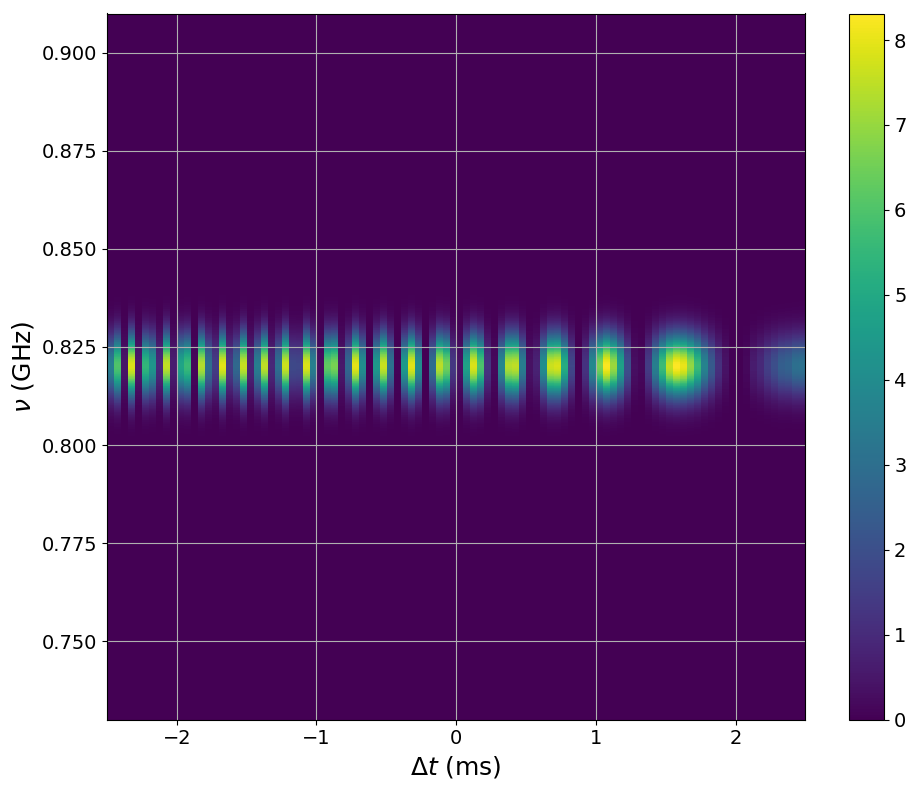

In [392]:
pulsedynspec(dso, dsl, 0.73*GHz, 0.91*GHz, dm, upvec, veff, taxis, dt, 100)

rF2 = 8.52847033669e+21
Roots = [[-1.24707294 -1.24707294]
 [-0.00430528 -0.00430528]
 [ 1.27846859  1.27846859]]
Int. params = [2162436.427431803, 1064091.0172375173, 2094995.9424607086]
TOAs (s) =[ 6.49145611e-06 -6.16428815e-05  4.72605027e-06]
Amps = [1.37050727 0.04305447 1.44714075]


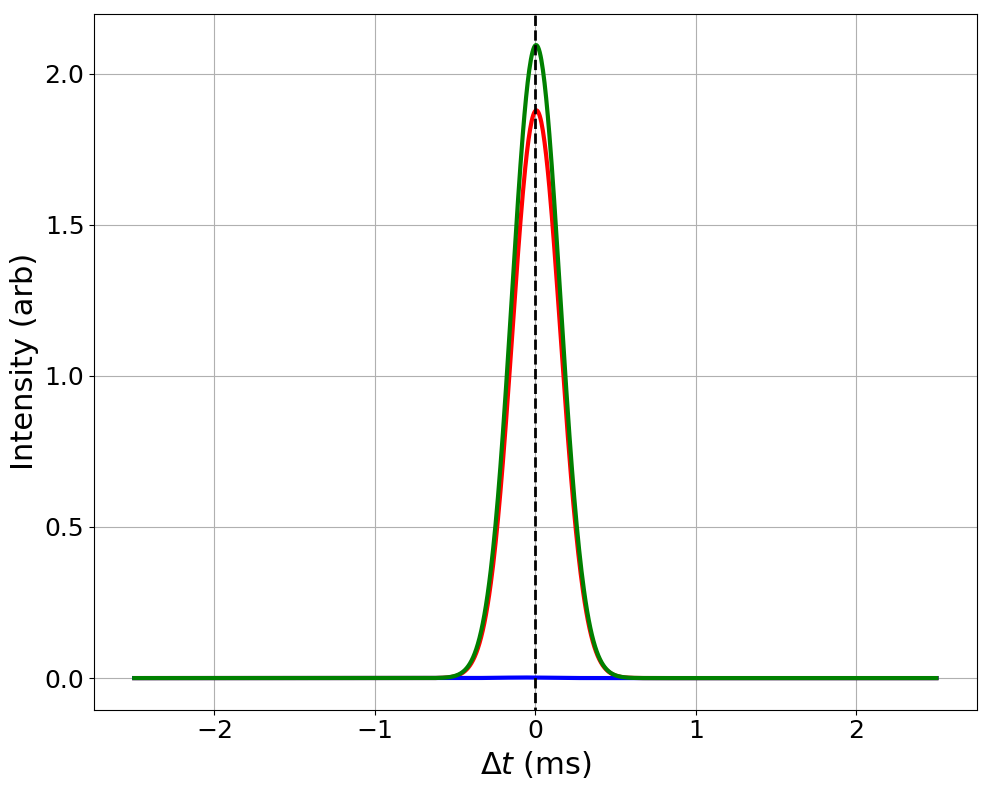

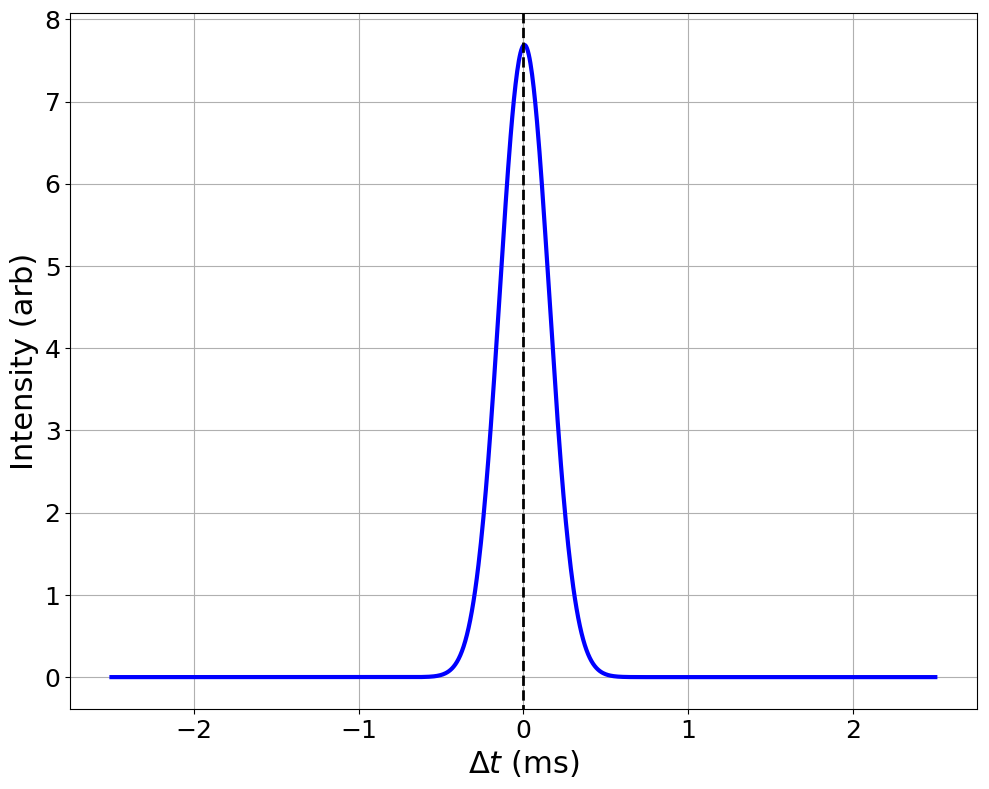

In [389]:
pulseint(dso, dsl, f, dm, upvec, veff, taxis, dt)

In [381]:
2*pi*0.82*GHz/(300e5*0.5*c*re*(1+0.09/0.82))

36636.81539473649

In [382]:
np.zeros([2, 4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
a = [1, 2, 3, 4]
np.sum(a)

10

In [8]:
np.sum(a[:2])

3

In [64]:
a = np.array([[1 + 1j, 2, 3], [2, 3, 4], [1, 2, 3], [1, 2, 3], [2, 3, 4]])

In [21]:
wind = 2
end = len(a) - len(a)%wind
av = np.zeros([end/wind, 3])
for i in range(end/wind - wind, wind):
    newrow = np.zeros(3)
    for j in range(wind):
        newrow = newrow + a[:][i + j]
    av[i] = newrow/float(wind)

In [48]:
from scipy.ndimage import uniform_filter1d

In [57]:
uniform_filter1d(a, size = 2, axis = 0, mode = 'nearest')

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [58]:
def groupedAvg(myArray, N=2):
    result = np.cumsum(myArray, 0)[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]
    return result

In [65]:
groupedAvg(a, N = 2)

array([[1.5+0.5j, 2.5+0. j, 3.5+0. j],
       [1. +0. j, 2. +0. j, 3. +0. j]])

In [62]:
def avg(myArray, N=2):
    cum = np.cumsum(myArray,0)
    result = cum[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]

    remainder = myArray.shape[0] % N
    if remainder != 0:
        if remainder < myArray.shape[0]:
            lastAvg = (cum[-1]-cum[-1-remainder])/float(remainder)
        else:
            lastAvg = cum[-1]/float(remainder)
        result = np.vstack([result, lastAvg])

    return result

In [68]:
import pandas as pd

In [72]:
pd.Series(list(a)).rolling(5).mean()

0    [(1+1j), (2+0j), (3+0j)]
1    [(2+0j), (3+0j), (4+0j)]
2    [(1+0j), (2+0j), (3+0j)]
3    [(1+0j), (2+0j), (3+0j)]
4    [(2+0j), (3+0j), (4+0j)]
dtype: object

In [74]:
np.mean(a, 0)

array([1.4+0.2j, 2.4+0. j, 3.4+0. j])

In [75]:
a

array([[1.+1.j, 2.+0.j, 3.+0.j],
       [2.+0.j, 3.+0.j, 4.+0.j],
       [1.+0.j, 2.+0.j, 3.+0.j],
       [1.+0.j, 2.+0.j, 3.+0.j],
       [2.+0.j, 3.+0.j, 4.+0.j]])